# Complement DE matrix plots

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

GENES =  ['MASP1','C2','CFB','CFD','CFI','C3','C4A','C5','C6','C7','C8G','C9']
# Read the specific columns from each sheet

sheet_names = ['Stem_cell', 'TA','Enterocyte','Goblet','Tuft','EEC', 'Paneth']

merged_data_m,merged_data_h = pd.DataFrame(),pd.DataFrame()

#
path_m = r"bat_mouse_gut_DE.xlsx" # Listed as  Extended Table 4
path_h = r"bat_human_gut_DE.xlsx" # Listed as  Extended Table 3

# Iterate over each sheet

for sheet_name in sheet_names:
    # Read the sheet
    sheet_data_m = pd.read_excel(path_m, sheet_name=sheet_name,index_col='Unnamed: 0.1')
    for complement in GENES:
        if complement not in sheet_data_m.index:
            sheet_data_m.loc[complement] = 0.015
    sheet_data_m = sheet_data_m.loc[GENES]
    
    sheet_data_h = pd.read_excel(path_h, sheet_name=sheet_name,index_col='Unnamed: 0.1')
    for complement in GENES:
        if complement not in sheet_data_h.index:
    # If the gene is not expressed in over 10% of the cells/ log2FC < 0.25 
            sheet_data_h.loc[complement] = 0.015 # specific value in order to distinguish and color in grey in later processing
    sheet_data_h = sheet_data_h.loc[GENES]
    
    # Select the specific columns
    sheet_data_m = sheet_data_m[['p_val_adj']]
    sheet_data_h = sheet_data_h[['p_val_adj']]
    sheet_data_m.rename(columns={'p_val_adj':sheet_name},inplace=True)
    sheet_data_h.rename(columns={'p_val_adj':sheet_name},inplace=True)

    # Merge with the existing data based on the index
    
    if merged_data_m.empty:
            merged_data_m = sheet_data_m
    else:
        merged_data_m = merged_data_m.loc[GENES]
        merged_data_m = pd.concat([merged_data_m, sheet_data_m], axis="columns",)
        
    if merged_data_h.empty:
            merged_data_h = sheet_data_h
    else:
        merged_data_h = merged_data_h.loc[GENES]
        merged_data_h = pd.concat([merged_data_h, sheet_data_h], axis="columns",)
        
DE_data = {'Human':merged_data_h,'Mouse':merged_data_m}
        
# Replace zeroes with the second lowest value
for species in DE_data:
    values = DE_data[species].values.flatten()
    non_zero_values = values[values != 0]
    second_lowest_value = np.partition(non_zero_values, 1)[0]
    DE_data[species] = DE_data[species].replace(0, second_lowest_value)
    DE_data[species] = -np.log10(DE_data[species])
    DE_data[species].rename(columns={'Stem_cell':'Stem cell'},inplace=True)

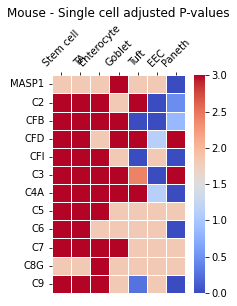

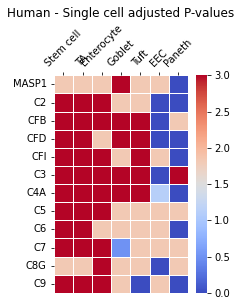

In [33]:


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# Create the heatmap
plt.figure(figsize=(3, 4))


heatmap = sns.heatmap(DE_data['Mouse'], annot=False, cmap='coolwarm',vmin=0,vmax=3, linewidths=1, linecolor='white')

# Rotate column titles
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_ylabel('')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add column titles as tick labels
plt.title('Mouse - Single cell adjusted P-values')

plt.savefig("Single_cell_gut_qval_complement_mouse.pdf",bbox_inches='tight', transparent=True, format="pdf")

# Display the heatmap
plt.show()


plt.figure(figsize=(3, 4))

heatmap = sns.heatmap(DE_data['Human'], annot=False, cmap='coolwarm',vmin=0,vmax=3, linewidths=1, linecolor='white')

# Rotate column titles
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_ylabel('')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add column titles as tick labels
plt.title('Human - Single cell adjusted P-values')

plt.savefig("Single_cell_gut_qval_complement_human.pdf",bbox_inches='tight', transparent=True, format="pdf")

# Display the heatmap
plt.show()

In [15]:
path_m = r"bat_mouse_gut_DE.xlsx"
path_h = r"bat_human_gut_DE.xlsx"
sheet_data_m = pd.read_excel(path_m, sheet_name=sheet_names,index_col='Unnamed: 0.1')
sheet_data_h = pd.read_excel(path_h, sheet_name=sheet_names,index_col='Unnamed: 0.1')
GENES =  ['MASP1','C2','CFB','CFD','CFI','C3','C4A','C5','C6','C7','C8G','C9']

In [23]:
print('mouse\n')

for name in sheet_names:
    for index in sheet_data_m[name].index:
        if index in GENES:
            if sheet_data_m[name].at[index,'avg_log2FC']<-0.25:
                print(name, index,sheet_data_m[name].at[index,'p_val_adj'])
        else:
            pass

print('\n\n\nhuman\n')

for name in sheet_names:
    for index in sheet_data_h[name].index:
        if index in GENES:
            if sheet_data_h[name].at[index,'avg_log2FC']<-0.25:
                print(name, index,sheet_data_h[name].at[index,'p_val_adj'])
        else:
            pass

mouse

Tuft C2 4.84820376022316e-21



human

Enterocyte C8G 1.67883619513046e-39
EEC C8G 1.0


>  Specific considerations - genes expressed more highly in non bat species in the DE 

- Tuft C2 4.84820376022316e-21 - Significantly more expressed in tuft cells in mouse 
- Enterocyte C8G 1.67883619513046e-39 - Significantly more expressed in tuft cells in human 